<a href="https://colab.research.google.com/github/mxnlmn/ML4.4_PW/blob/main/%D0%9A%D0%A02_%D0%A2%D0%B8%D0%BC%D0%BE%D1%88%D0%B5%D0%BD%D0%BA%D0%BE_%D0%92_%D0%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 976.7 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163761 sha256=31084f2712b134160410f29ba9f67e62569c874e12128c22695d21407147af0e
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [3]:
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise import SVD, SVDpp
import matplotlib.pyplot as plt

In [4]:
# Завантаження датасету movielens-100k
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [5]:
# Створення об'єкта Reader для зчитування даних
reader = Reader(line_format='user item rating timestamp', sep='\t')

In [6]:
# Визначення алгоритмів
algorithms = [SVD(), SVDpp()]

In [7]:
# Перебір алгоритмів та підбір параметрів за допомогою крос-валідації
for algo in algorithms:
    print(f'Cross validating {algo.__class__.__name__}')
    results = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=True)
    print(f'Mean RMSE: {results["test_rmse"].mean()}')

Cross validating SVD
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9292  0.9328  0.9373  0.9472  0.9362  0.9366  0.0060  
Fit time          3.63    1.44    1.50    1.45    1.44    1.89    0.87    
Test time         0.17    0.26    0.14    0.21    0.24    0.21    0.05    
Mean RMSE: 0.9365520374215002
Cross validating SVDpp
Evaluating RMSE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9205  0.9160  0.9224  0.9181  0.9189  0.9192  0.0022  
Fit time          39.28   28.00   27.48   27.61   28.64   30.20   4.56    
Test time         4.26    5.53    4.61    4.56    5.71    4.93    0.58    
Mean RMSE: 0.9191599708009465


In [8]:
# Вибір найкращого алгоритму
best_algorithm = SVD()  # чи SVDpp, залежно від результатів крос-валідації

In [9]:
# Обучення моделі на всьому наборі даних
trainset = data.build_full_trainset()
best_algorithm.fit(trainset)

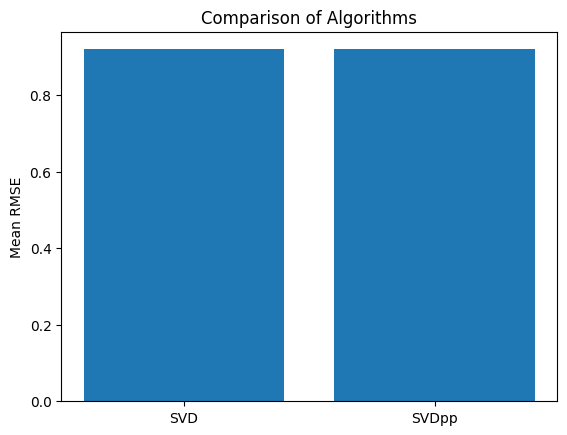

In [10]:
# Візуалізація
plt.bar(['SVD', 'SVDpp'], [results['test_rmse'].mean() for algo in algorithms])
plt.ylabel('Mean RMSE')
plt.title('Comparison of Algorithms')
plt.show()